# HW5

 - you are given two univariate time series datasets a.txt and b.txt, representing integer senseor measurements (The column indicating time is omitted; you may assume that the samples are 1 second apart).

 - Incude all your plots as well as an executable Python code (py or ipynb) with a report (pdf, word,  or hwp) with answers to the following questions.

### 0. Check and remove any noise present in datasets. Use the cleaned datasets for the rest of the questions.

In [1]:
A=[]

file=open('./HW5/a.txt', 'rt', encoding='UTF16')

while True :
    
    line = file.readline()

    try : 
        escape = line.index('\n')
    except :
        escape = len(line)
    
    if line:
        A.append(line[0:escape])
    else:
        break
    
file.close()

In [2]:
B=[]

file=open('./HW5/b.txt', 'rt', encoding='UTF16')

while True :
    
    line = file.readline()

    try : 
        escape = line.index('\n')
    except :
        escape = len(line)
    
    if line:
        B.append(line[0:escape])
    else:
        break
    
file.close()

In [3]:
import pandas as pd
A_df = pd.DataFrame()
B_df = pd.DataFrame()

### 1. Plot the respective PMFs of a.txt and b.txt together for all X in [1,2,...,100]. Include the mean and median of each dataset in the plot (Clearly label the X-axis and the Y-axis)

In [4]:
# Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

def PMF ( data, df, title ) : 
    
    # Data Sorting
    data.sort()
    
    # Change to Integer
    data = list(map(int, data))

    for i in range(1,101,1) : 
        
        # Create DataFrame
        df = df.append({'x':i, 'P(X=x)':data.count(i)/len(data)}, ignore_index=True)

    # Order to Columns
    df = df[['x', 'P(X=x)']]
    
    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(18,6))
    ax = sns.barplot(x="x", y="P(X=x)", data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(title)
    plt.show()
    
    return None

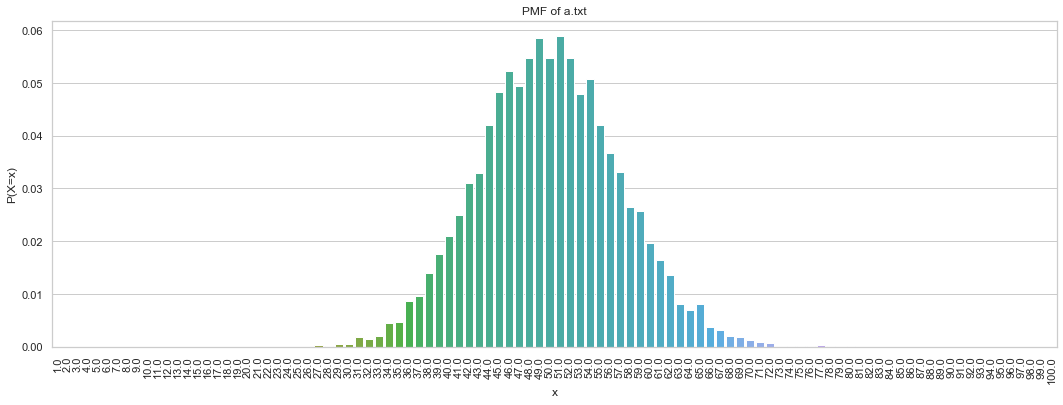

In [5]:
PMF ( A, A_df, title = 'PMF of a.txt' )

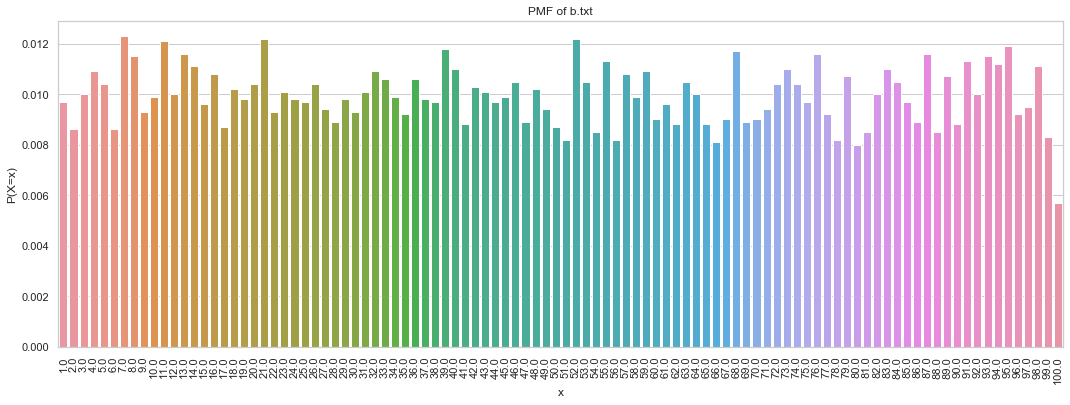

In [6]:
PMF ( B, B_df, title = 'PMF of b.txt' )

### 1. Plot the respective CDFs of a.txt and b.txt together for all X in [1,2,...,100]. Include the mean and median of each dataset in the plot (Clearly label the X-axis and the Y-axis)

In [7]:
def CDF ( data, df, title ) : 
    
    cdf = 0
    
    # Data Sorting
    data.sort()
    
    # Change to Integer
    data = list(map(int, data))

    for i in range(1,101,1) : 
        
        cdf += data.count(i)/len(data)
        
        # Create DataFrame
        df = df.append({'x':i, 'P(X<=x)':cdf}, ignore_index=True)

    # Order to Columns
    df = df[['x', 'P(X<=x)']]
    
    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(18,6))
    ax = sns.barplot(x="x", y="P(X<=x)", data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(title)
    plt.show()
    
    return None

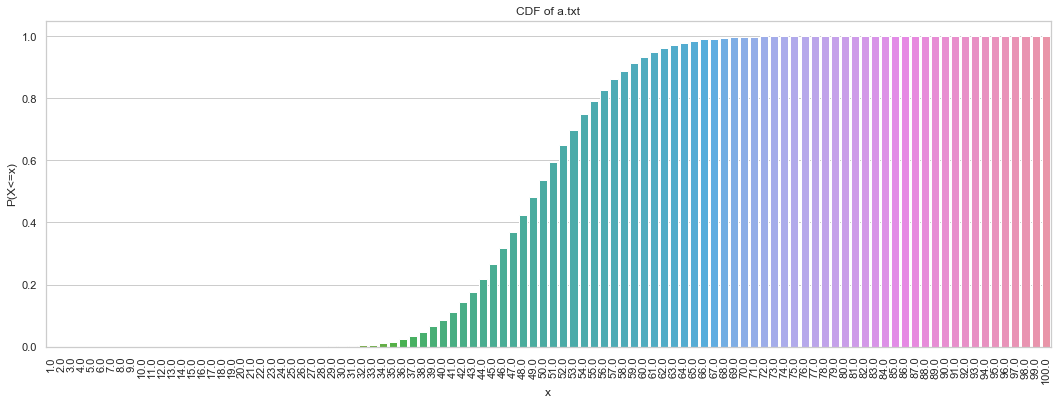

In [8]:
CDF ( A, A_df, title = 'CDF of a.txt' )

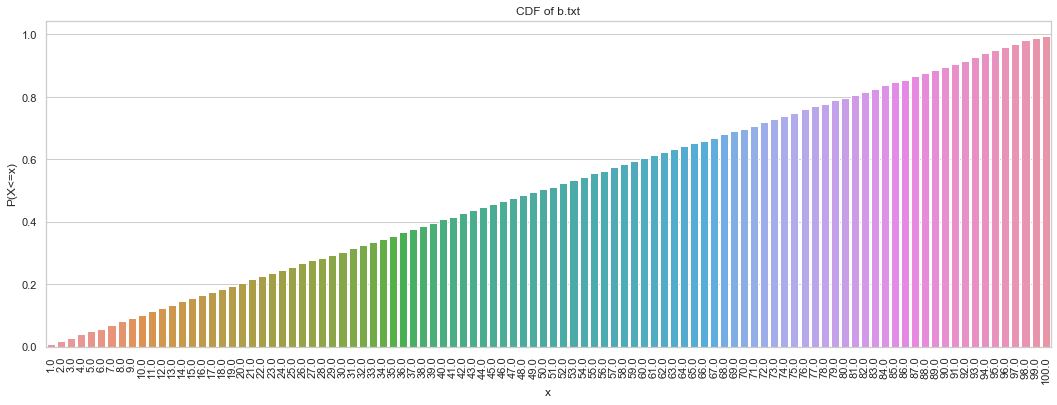

In [9]:
CDF ( B, B_df, title = 'CDF of b.txt' )

$$P(0) = 2^{-100}$$

### 3. Compute the entropy $H(P)$ of the random variable $P(x)$ ~ distribution of a.txt

In [10]:
def H ( data ) : 
    
    import numpy as np
    
    data.sort()
    
    data = list(map(int, data))
    
    df = pd.DataFrame()
    
    for i in range(1,101,1) : 
        
        df = df.append({'x':i, 'P(X=x)':np.float(data.count(i)/len(data))}, ignore_index=True)

    df = df[['x', 'P(X=x)']]
        
    df = df[df['P(X=x)'] != 0]
    
    H = 0
        
    for idx in df.index : 
        
        H = H + df.loc[idx]['P(X=x)'] * np.log2(df.loc[idx]['P(X=x)'])
    
    H = -1 * H
    
    return H

H(A)

4.848677778718741

### 4. Compute the entropy $P(Q)$ of the random variable $Q(x)$ ~ distribution of btxt

In [11]:
def H ( data ) : 
    
    import numpy as np
    
    data.sort()
    
    data = list(map(int, data))
    
    df = pd.DataFrame()
    
    for i in range(1,101,1) : 
        
        df = df.append({'x':i, 'P(X=x)':np.float(data.count(i)/len(data))}, ignore_index=True)

    df = df[['x', 'P(X=x)']]
        
    df = df[df['P(X=x)'] != 0]
    
    H = 0
        
    for idx in df.index : 
        
        H = H + df.loc[idx]['P(X=x)'] * np.log2(df.loc[idx]['P(X=x)'])
    
    H = -1 * H
    
    return H

H(B)

6.607640935582562

$$H'(P,Q) = -\sum_{i=1}^{n}(P(x_i) \times log(Q(x_i)))$$

$$D"_{KL}(P||Q) = \sum_{i=1}^{n}(P(x_i) \times log{P(x_i) \over Q(x_i)})$$

$$D"_{KL}(Q||P) = \sum_{i=1}^{n}(Q(x_i) \times log{Q(x_i) \over P(x_i)})$$

### 5. Compute $H'(P,Q), for\;n=20$

In [12]:
def H_prime_P_Q ( P, Q ) : 
    
    import numpy as np
    
    P.sort()
    Q.sort()

    data_P = list(map(int, P))
    data_Q = list(map(int, Q))
    
    df_P = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_P = df_P.append({'x':i, 'P(X=x_p)':np.float(data_P.count(i)/len(data_P))}, ignore_index=True)
    df_P = df_P[['x', 'P(X=x_p)']]
    
    df_Q = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_Q = df_Q.append({'x':i, 'P(X=x_q)':np.float(data_Q.count(i)/len(data_Q))}, ignore_index=True)
    df_Q = df_Q[['x', 'P(X=x_q)']]
    
    df = pd.merge(df_P, df_Q, how='inner')
    
    df = df[df['P(X=x_p)'] != 0]
    
    df = df.reset_index()
    
    df = df[['x', 'P(X=x_p)', 'P(X=x_q)']]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + df.loc[idx]['P(X=x_p)'] * np.log2(1/df.loc[idx]['P(X=x_q)'])
            
    return H

H_prime_P_Q ( A, B )

2.1099115316166523

### 6. Compute $D'_{KL}(P||Q), for\;n=20$

In [13]:
def KLD_1 ( P, Q ) : 
    
    import numpy as np
    
    P.sort()
    Q.sort()

    data_P = list(map(int, P))
    data_Q = list(map(int, Q))
    
    df_P = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_P = df_P.append({'x':i, 'P(X=x_p)':np.float(data_P.count(i)/len(data_P))}, ignore_index=True)
    df_P = df_P[['x', 'P(X=x_p)']]
    
    df_Q = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_Q = df_Q.append({'x':i, 'P(X=x_q)':np.float(data_Q.count(i)/len(data_Q))}, ignore_index=True)
    df_Q = df_Q[['x', 'P(X=x_q)']]
    
    df = pd.merge(df_P, df_Q, how='inner')
    
    df = df[df['P(X=x_p)'] != 0]
    
    df = df.reset_index()
    
    df = df[['x', 'P(X=x_p)', 'P(X=x_q)']]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + df.loc[idx]['P(X=x_p)'] * np.log2(df.loc[idx]['P(X=x_p)'] / df.loc[idx]['P(X=x_q)'])
            
    return H

KLD_1 ( A, B )

0.4669392653488953

### 7. Compute $D'_{KL}(Q||P), for\;n=20$

In [14]:
def KLD_2 ( P, Q ) : 
    
    import numpy as np
    
    P.sort()
    Q.sort()

    data_P = list(map(int, P))
    data_Q = list(map(int, Q))
    
    df_P = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_P = df_P.append({'x':i, 'P(X=x_p)':np.float(data_P.count(i)/len(data_P))}, ignore_index=True)
    df_P = df_P[['x', 'P(X=x_p)']]
    
    df_Q = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_Q = df_Q.append({'x':i, 'P(X=x_q)':np.float(data_Q.count(i)/len(data_Q))}, ignore_index=True)
    df_Q = df_Q[['x', 'P(X=x_q)']]
    
    df = pd.merge(df_P, df_Q, how='inner')
    
    df = df[df['P(X=x_p)'] != 0]
    
    df = df.reset_index()
    
    df = df[['x', 'P(X=x_p)', 'P(X=x_q)']]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + df.loc[idx]['P(X=x_q)'] * np.log2(df.loc[idx]['P(X=x_q)'] / df.loc[idx]['P(X=x_p)'])
            
    return H

KLD_2 ( A, B )

0.1428451754373842

### 8. Compare  $D'_{KL}(P||Q)$ and  $D'_{KL}(Q||P)$. Are the different, same, similar? Explain.

P와 Q의 순서가 달라지면 KLD의 값도 달라진다.

### 9. Compute $H(P) + D'_{KL}(P||Q)$.

In [15]:
H(A) + KLD_1 ( A, B )

5.315617044067636

### 10. Compare $H'(P,Q)$ and $H(P) + D'_{KL}(P||Q)$. Are they different, same, similar? Explain.

In [16]:
def H ( data ) : 
    
    import numpy as np
    
    data.sort()
    
    data = list(map(int, data))
    
    df = pd.DataFrame()
    
    for i in range(1,101,1) : 
        
        df = df.append({'x':i, 'P(X=x)':np.float(data.count(i)/len(data))}, ignore_index=True)

    df = df[['x', 'P(X=x)']]
        
    df = df[df['P(X=x)'] != 0]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + df.loc[idx]['P(X=x)'] * np.log2(df.loc[idx]['P(X=x)'])
    
    H = -1 * H
    
    return H

H_prime_P_Q ( A, B ) - ( H(A) + KLD_1 ( A, B ) )

0.0

이 둘 사이의 차이는 0이다. 결국 Cross Entropy의 값은 KLD의 값과 같다.

### 11. Compute $J'(P||Q), for\;n=20$, where $J'(P||Q) =  0.5 \times D'_{KL}(P||M) + 0.5 \times D'_{KL}(Q||M)$ and $M = {1 \over 2}(P + Q)$.

In [17]:
def H_prime_P_Q ( P, Q ) : 
    
    import numpy as np
    
    P.sort()
    Q.sort()

    data_P = list(map(int, P))
    data_Q = list(map(int, Q))
    
    df_P = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_P = df_P.append({'x':i, 'P(X=x_p)':np.float(data_P.count(i)/len(data_P))}, ignore_index=True)
    df_P = df_P[['x', 'P(X=x_p)']]
    
    df_Q = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_Q = df_Q.append({'x':i, 'P(X=x_q)':np.float(data_Q.count(i)/len(data_Q))}, ignore_index=True)
    df_Q = df_Q[['x', 'P(X=x_q)']]
    
    df = pd.merge(df_P, df_Q, how='inner')
    
    df = df[df['P(X=x_p)'] != 0]
    
    df['M'] = (df['P(X=x_p)'] + df['P(X=x_q)']) / 2
    
    df = df.reset_index()
    
    df = df[['x', 'P(X=x_p)', 'P(X=x_q)', 'M']]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + 0.5 * df.loc[idx]['P(X=x_p)'] * np.log2(df.loc[idx]['P(X=x_p)'] / df.loc[idx]['M'])\
              + 0.5 * df.loc[idx]['P(X=x_q)'] * np.log2(df.loc[idx]['P(X=x_q)'] / df.loc[idx]['M'])
            
    return H

H_prime_P_Q ( A, B )

0.06560189666881291

### 12. Compute $J'(Q||P), for\;n=20$.

In [18]:
def H_prime_P_Q ( P, Q ) : 
    
    import numpy as np
    
    P.sort()
    Q.sort()

    data_P = list(map(int, P))
    data_Q = list(map(int, Q))
    
    df_P = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_P = df_P.append({'x':i, 'P(X=x_p)':np.float(data_P.count(i)/len(data_P))}, ignore_index=True)
    df_P = df_P[['x', 'P(X=x_p)']]
    
    df_Q = pd.DataFrame()    
    for i in range(1,101,1) : 
        df_Q = df_Q.append({'x':i, 'P(X=x_q)':np.float(data_Q.count(i)/len(data_Q))}, ignore_index=True)
    df_Q = df_Q[['x', 'P(X=x_q)']]
    
    df = pd.merge(df_P, df_Q, how='inner')
    
    df = df[df['P(X=x_p)'] != 0]
    
    df['M'] = (df['P(X=x_p)'] + df['P(X=x_q)']) / 2
    
    df = df.reset_index()
    
    df = df[['x', 'P(X=x_p)', 'P(X=x_q)', 'M']]
    
    H = 0
        
    for idx in df.index[:20] : 
        
        H = H + 0.5 * df.loc[idx]['P(X=x_q)'] * np.log2(df.loc[idx]['P(X=x_q)'] / df.loc[idx]['M'])\
              + 0.5 * df.loc[idx]['P(X=x_p)'] * np.log2(df.loc[idx]['P(X=x_p)'] / df.loc[idx]['M'])
            
    return H

H_prime_P_Q ( A, B )

0.06560189666881291

### 13. Compare $J'(P||Q)$ and $J'(Q||P)$. Are they different, same, similar? Explain.

0.06560189666881291 = 0.06560189666881291

두 식의 값은 같다. 이 값은 P와 Q의 순서에 상관없이 동일한 결과를 보여준다.

### 14. Explain why Cross Entropy is Widely used as a loss function in Machine Learning problems.

P를 우리가 가지고 있는 정답 분포, Q가 모델이 추정한 분포라고 했을 때, KLD를 최소화 하는 것은 곧 Cross Entropy를 최소화하는 것이고, 이는 정답 분포인 P와 모델의 분포 Q의 차이를 줄이는 것으로 해석할 수 있기 때문이다.

### 15. Explain the pros and cons of KL divergence($D_{KL}$) as a distance metric. Why it is useful/not useful?

KLD를 만약, 두 분포 사이의 거리라고 정의한다면, P와 Q의 위치가 바뀌어도 거리의 값은 바뀌면 안된다. 하나 KLD는 그렇지 못하므로 거리라고 말할 수 없다. 따라서 이 KLD를 거리 개념으로 사용하기 위해서는 JSD와 같은 값으로 바꿔 주어야 한다. JSD는 P와 Q의 위치가 서로 바뀌어도 그 값은 같기 때문에 '두 분포 사이의 거리' 라는 개념으로 사용될 수 있다.